## retrieve weather data

In [1]:
import sys

sys.path.append("../../../Scripts/")
import preprocessing.retrieve_temp_data

In [ ]:
preprocessing.retrieve_temp_data.extract_temp_data()
# output filename == ../../../Data/supplementary_data/weather/mtl_temp_prec_2016

Please enter required year (2016 or 2017)../../../Data/supplementary_data/weather/mtl_temp_prec_2016
Please enter required year (2016 or 2017)2016
Enter output filename (.nc extension will be added)../../../Data/supplementary_data/weather/mtl_temp_prec_2016


2019-10-20 13:43:06,491 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-land
2019-10-20 13:43:08,597 INFO Request is queued
2019-10-20 14:29:30,199 INFO Request is running


In [3]:
preprocessing.retrieve_temp_data.extract_temp_data()
# output filename == ../../../Data/supplementary_data/weather/mtl_temp_prec_2017

Please enter required year (2016 or 2017)2017
Enter output filename (.nc extension will be added)mtl_temp_prec_2017


2019-10-14 14:53:54,557 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-land


{'year': '2017', 'month': ['09', '10']}


2019-10-14 14:53:55,312 INFO Request is completed
2019-10-14 14:53:55,314 INFO Downloading http://136.156.132.210/cache-compute-0005/cache/data0/adaptor.mars.internal-1570965305.9196692-6325-1-369e985e-1007-46c4-9676-7ac3ed2a05f1.nc to mtl_temp_prec_2017.nc (12.7K)
2019-10-14 14:53:55,443 INFO Download rate 99.8K/s


## clean and merge

In [4]:
import iris
import iris.plot as iplt
import iris.quickplot as qplt
import iris.pandas as ip
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import numpy as np

%matplotlib inline

In [105]:
cubes_16 = iris.load('mtl_temp_prec_2016.nc')
print(cubes_16)
mtl_temp_16 = cubes_16[0]
mtl_prec_16 = cubes_16[1]

cubes_17 = iris.load('mtl_temp_prec_2017.nc')
print("\n 2017: \n",cubes_17)
mtl_temp_17 = cubes_17[0]
mtl_prec_17 = cubes_17[1]

0: 2 metre temperature / (K)           (time: 2928; latitude: 1; longitude: 1)
1: Total precipitation / (m)           (time: 2928; latitude: 1; longitude: 1)

 2017: 
 0: 2 metre temperature / (K)           (time: 1464; latitude: 1; longitude: 1)
1: Total precipitation / (m)           (time: 1464; latitude: 1; longitude: 1)


In [106]:
# view coords of time
mtl_temp_16.coords()

[DimCoord(array([1022688, 1022689, 1022690, ..., 1025613, 1025614, 1025615],
       dtype=int32), standard_name='time', units=Unit('hours since 1900-01-01 00:00:00.0', calendar='gregorian'), long_name='time', var_name='time'),
 DimCoord(array([45.], dtype=float32), standard_name='latitude', units=Unit('degrees'), long_name='latitude', var_name='latitude'),
 DimCoord(array([-73.], dtype=float32), standard_name='longitude', units=Unit('degrees'), long_name='longitude', var_name='longitude')]

In [107]:
# view data -> it is in Kelvin
mtl_temp_16.data[:5]

masked_array(
  data=[[[292.70101968]],

        [[292.46779795]],

        [[291.68311213]],

        [[291.44365035]],

        [[291.52711097]]],
  mask=False,
  fill_value=1e+20)

In [111]:
# first date
print(mtl_temp_16.coords('time')[0][0].points[0])
print(mtl_temp_17.coords('time')[0][0].points[0])

1022688
1031448


In [113]:
## subset by dates of study (determined by hand)
# check if cube has already been subset by date
if not mtl_temp_16.coords('time')[0][0].points[0] > 1022688:
    mtl_temp_16 = mtl_temp_16[24:2520]
    mtl_prec_16 = mtl_prec_16[24:2520]
else:
    print("2016 already subset!")
    
if not mtl_temp_17.coords('time')[0][0].points[0] > 1031448:
    mtl_temp_17 = mtl_temp_17[408:1128]
    mtl_prec_17 = mtl_prec_17[408:1128]
else:
    print("2017 already subset!")

2016 already subset!
2017 already subset!


In [115]:
mtl_prec_16[0]

<iris 'Cube' of Total precipitation / (m) (latitude: 1; longitude: 1)>

In [116]:
mtl_prec_17[0]

<iris 'Cube' of Total precipitation / (m) (latitude: 1; longitude: 1)>

## convert temperature to Celsius

In [118]:
# convert from K to C.
if mtl_temp_16.data[0][0][0] > 100:
    mtl_temp_16.data = mtl_temp_16.data - 273.15
else:
    print("2016 already converted")
    
if mtl_temp_17.data[0][0][0] > 100:
    mtl_temp_17.data = mtl_temp_17.data - 273.15 
else:
    print("2017 already converted")

2016 already converted
2017 already converted


(0, 720)

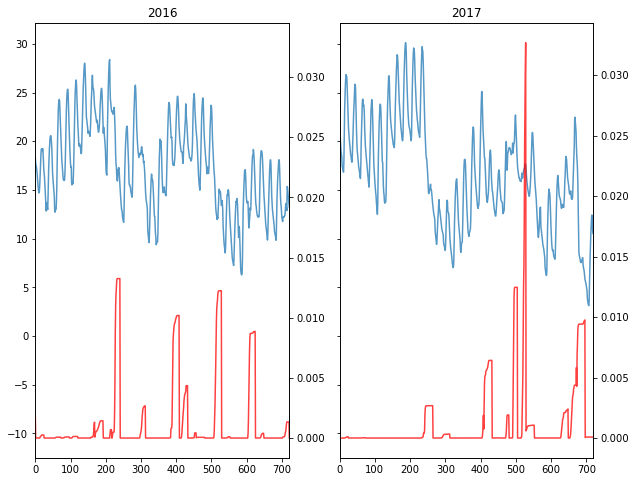

In [136]:
fig, (ax, ax2) = plt.subplots(1,2, figsize=(10,8), sharey=True)
ax.plot([i[0][0] for i in mtl_temp_16.data.data], alpha=.75)
ax1 = ax.twinx()
ax1.plot([i[0][0] for i in mtl_prec_16.data.data], color='red', alpha=.75)
ax.set_title("2016")
ax.set_xlim(0,720)

ax2.plot([i[0][0] for i in mtl_temp_17.data.data], alpha=.75)
ax3 = ax2.twinx()
ax3.plot([i[0][0] for i in mtl_prec_17.data.data], color='red', alpha=.75)
ax2.set_title("2017")
ax2.set_xlim(0,720)

Text(0.5, 1.0, '2016 until December')

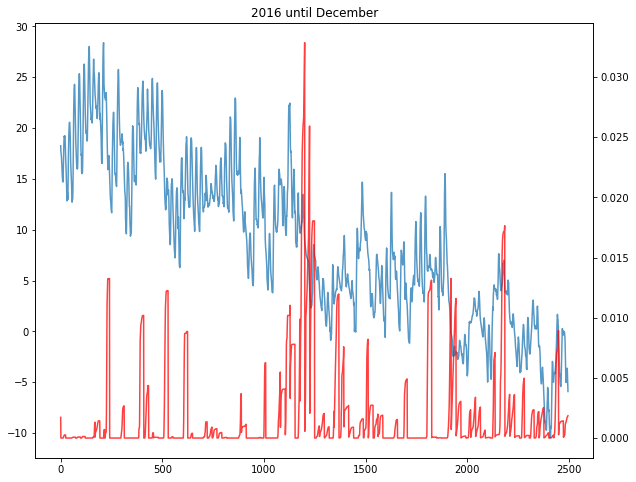

In [139]:
fig, ax= plt.subplots(1, figsize=(10,8), sharey=True)
ax.plot([i[0][0] for i in mtl_temp_16.data.data], alpha=.75)
ax1 = ax.twinx()
ax1.plot([i[0][0] for i in mtl_prec_16.data.data], color='red', alpha=.75)
ax.set_title("2016 until December")

## add to MTL_Trajet data

In [143]:
def make_weather_df(mtl_temp, mtl_prec):
    first_time_hours = int(mtl_temp.coords()[0][0].points[0])
    last_time_hours = int(mtl_temp.coords()[0][-1].points[0])
    last_time_point = datetime.datetime(1900,1,1,0) + datetime.timedelta(hours=last_time_hours)
    total_hours = len(mtl_temp.coords()[0].points)
    
    # get all hours between the start and end dates
    date_list = [last_time_point - datetime.timedelta(hours=x) for x in range(total_hours)]
    date_list.reverse()
    
    precs = [i[0][0] for i in mtl_prec.data.data]
    temps = [i[0][0] for i in mtl_temp.data.data]
    df_dict = {"precipitation" : precs, "temperature" : temps}
    df = pd.DataFrame.from_dict(df_dict)
    df['dt'] = date_list
    return df



In [153]:
# make weather dataframes and append them to each other
weather_16 = make_weather_df(mtl_temp=mtl_temp_16, mtl_prec=mtl_prec_16)
weather_17 = make_weather_df(mtl_temp=mtl_temp_17, mtl_prec=mtl_prec_17)

In [154]:
weather_16.head()

,precipitation,temperature,dt
0,0.00172,18.253090,2016-09-02 00:00:00
1,0.00000,17.749206,2016-09-02 01:00:00
2,0.00000,17.533925,2016-09-02 02:00:00
3,0.00000,17.394304,2016-09-02 03:00:00
4,0.00000,17.090101,2016-09-02 04:00:00


In [155]:
weather_17.head()

,precipitation,temperature,dt
0,0.000004,21.655905,2017-09-18 00:00:00
1,0.000000,20.891177,2017-09-18 01:00:00
2,0.000000,20.182104,2017-09-18 02:00:00
3,0.000000,19.452417,2017-09-18 03:00:00
4,0.000000,18.951944,2017-09-18 04:00:00


In [158]:
weather_data = weather_16.append(weather_17).reset_index(drop=True)

In [159]:
weather_data.to_csv("../../../Data/supplementary_data/mtl_temp_prec.csv", index=False)

##  Note 
For appending to data, see 'all_preprocessing' notebook. 

Code used to do this:

In [ ]:
mtl_temp_prec['dt'] = mtl_temp_prec['dt'].apply(pd.to_datetime)
mtl_temp_prec = mtl_temp_prec.set_index('dt')

In [ ]:
def extract_weather_subset(row, weather_df):
    assert type(weather_df.index) == pd.core.indexes.datetimes.DatetimeIndex, ("the weather data needs a datetime index")
    
    start = row['starttime']
    end = row['endtime']
    subset_weather = weather_df.loc[start.strftime("%Y-%m-%d %H:%M:%S"):end.strftime("%Y-%m-%d %H:%M:%S")]
    if len(subset_weather) < 1:
        start = start - datetime.timedelta(hours=1)
        subset_weather = weather_df.loc[start.strftime("%Y-%m-%d %H:%M:%S"):end.strftime("%Y-%m-%d %H:%M:%S")]
    return subset_weather

def calc_mean_weather(subset):
#     print(len(subset), "hours worth of weather")
    return subset.precipitation.mean(), subset.temperature.mean()


In [ ]:
## apply average weather for trip to each row
gdf_2016['av_weather'] = gdf.apply(lambda row: calc_mean_weather(extract_weather_subset(row, mtl_temp_prec)), axis=1)

In [ ]:
temp_prec = gdf_2016.av_weather.apply(pd.Series)
temp_prec.columns = ['precip','temperature']

In [ ]:
gdf_2016 = pd.concat([gdf_2016,temp_prec], axis=1)